# SALARY ESTIMATION USING KNN:

# 1)IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import numpy as np

# 2)LOADING THE DATASET:

In [2]:
df=pd.read_csv(r'C:/Users/deysu/OneDrive/Documents/ML/PANTECH-SOLUTION INTERNSHIP\DAY-4(KNN)/4_SalaryEstimator_K-NearestNeighbour/salary.csv')

# 3)SUMMARIZE THE DATA:

In [3]:
df.shape

(32561, 5)

In [4]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [5]:
df.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

# 4)MAPPING SALARY DATA TO BINARY VALUE:

In [8]:
income_set=set(df['income'])
df['income']=df['income'].map({'<=50K':0,'>50K':1}).astype(int)
print(df.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


# 5)SEGREGATING DATASET INTO X AND Y: 

In [9]:
X=df.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [10]:
Y=df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

# 6)SPLITTING DATASET INTO TRAIN AND TEST:

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

# 7)FEATURE SCALING:

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)
print("\n.............................................\n")
print(X_test)

[[ 1.20264866 -2.76154633 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 ...
 [-0.92200734 -0.81532491 -0.14509813  0.85306386]
 [ 0.39674466  1.52014079 -0.14509813 -0.03923011]
 [ 0.03042466 -0.42608063  0.83219401 -0.03923011]]

.............................................

[[ 1.27591266 -1.98305776 -0.14509813 -0.03923011]
 [-1.43485534 -0.42608063 -0.14509813 -1.25599461]
 [-1.14179934 -0.03683634 -0.14509813 -0.44481828]
 ...
 [ 0.39674466 -0.03683634 -0.14509813  1.1775344 ]
 [ 1.42244067 -0.42608063 -0.14509813  0.77194623]
 [ 1.20264866 -0.03683634 -0.14509813  0.36635806]]


# 8)FINDING THE BEST K-VALUE:

Text(0, 0.5, 'Mean Error')

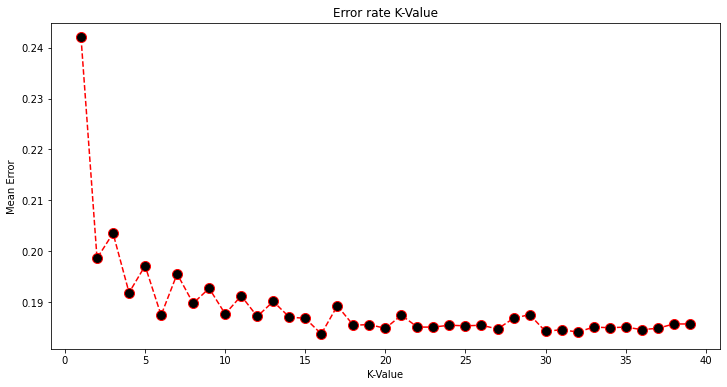

In [13]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    pred_i=model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color="red",linestyle="dashed",marker="o",markerfacecolor="black",markersize=10)
plt.title("Error rate K-Value")
plt.xlabel("K-Value")
plt.ylabel("Mean Error")

# 9)TRAINING:

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=16,metric="minkowski",p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=16)

# 10)PREDICTING THE INCOME:

In [16]:
age=int(input("Enter age of the new employee:"))
edu=int(input("Enter education of the new employee:"))
cg=int(input("Enter capital gain of the new employee:"))
wph=int(input("Enter working hour of the new employee:"))

new_emp=[[age,edu,cg,wph]]
result=model.predict(sc.transform(new_emp))
print(result)

if(result==1):
    print("Employee will get salary above 50K!")
else:
    print("Employee will not get salary above 50K! ")

Enter age of the new employee: 50
Enter education of the new employee: 3
Enter capital gain of the new employee: 40
Enter working hour of the new employee: 6


[0]
Employee will not get salary above 50K! 


# 11)PREDICTING FOR ALL TEST DATA:

In [17]:
Y_pred=model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# 12)EVALUATING MODEL-CONFUSION MATRIX(FOR VALIDATION):

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)

print("CONFUSION MATRIX:")
print(cm)

print("ACCURACY:{0}%".format(accuracy_score(Y_test,Y_pred)*100))


CONFUSION MATRIX:
[[5882  311]
 [1185  763]]
ACCURACY:81.62387913032796%
